In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math score'],axis=1)

In [6]:
y=df['math score']

In [7]:
## create column transformer with 3 types of transformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEmcoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),

    ]
)


In [8]:
X = preprocessor.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [10]:
X_train.shape , y_train.shape,X_test.shape,y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [11]:

df.shape

(1000, 8)

In [14]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square




In [17]:
## Begining ModelmTraning

models = {

    "Linear Regression":LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "k-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" :DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "adaboost regresor" : AdaBoostRegressor(),
    "Cat Boost Regressor ": CatBoostRegressor(),
    "XGB regressor": XGBRegressor()

}

model_list =[]
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])

    model_list.append(list(models.keys())[i])


    # Print model performance
    print('Model performance for training set:')
    print("-Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- Mean absolute Error : {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('-------------------------------------------------------------------------')

    print('Model performance for test set:')    
    print("-Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- Mean absolute Error : {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("=" * 35)
    print('\n')




Linear Regression
Model performance for training set:
-Root Mean Squared Error : 5.3244
- Mean absolute Error : 4.2671
- R2 Score: 0.8743
-------------------------------------------------------------------------
Model performance for test set:
-Root Mean Squared Error : 5.3960
- Mean absolute Error : 4.2158
- R2 Score: 0.8803


Lasso
Model performance for training set:
-Root Mean Squared Error : 6.5938
- Mean absolute Error : 5.2063
- R2 Score: 0.8071
-------------------------------------------------------------------------
Model performance for test set:
-Root Mean Squared Error : 6.5197
- Mean absolute Error : 5.1579
- R2 Score: 0.8253


Ridge
Model performance for training set:
-Root Mean Squared Error : 5.3233
- Mean absolute Error : 4.2650
- R2 Score: 0.8743
-------------------------------------------------------------------------
Model performance for test set:
-Root Mean Squared Error : 5.3904
- Mean absolute Error : 4.2111
- R2 Score: 0.8806


k-Neighbors Regressor
Model perfor

In [20]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,Cat Boost Regressor,0.851632
5,Random Forest Regressor,0.849904
6,adaboost regresor,0.847817
8,XGB regressor,0.827797
1,Lasso,0.825320
3,k-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.741060


## Linear Regression


In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


## plot y_pred and y_test

Text(0, 0.5, 'predicted')

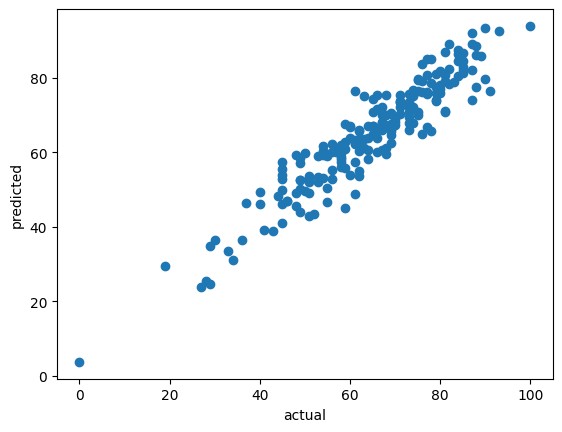

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

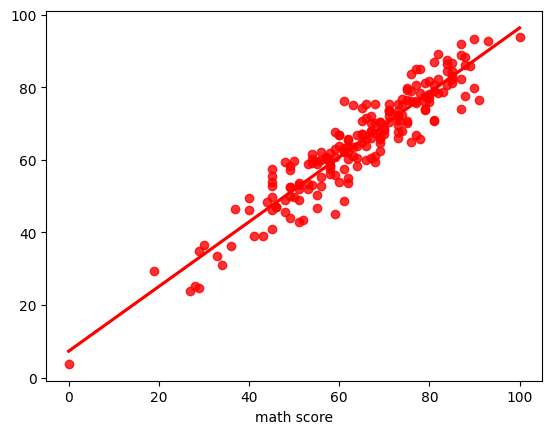

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

## differance between actual and predicted values

In [26]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Differance':y_test-y_pred})

In [27]:
pred_df

,Actual Value,Predicted Value,Differance
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
